In [4]:
# !pip install pandas

In [5]:
import pandas as pd
import json

In [6]:
#load csv
# true_df = pd.read_csv("True.csv")
true_df = pd.read_csv("../data/True.csv")

#add label
true_df["label"] = 1
true_df

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [7]:
#load csv
fake_df = pd.read_csv("../data/Fake.csv")

#add label
fake_df["label"] = 0
fake_df

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [8]:
# Concatenate datasets
news_df = pd.concat([fake_df, true_df], ignore_index=True)

#drop date column
news_df.drop(columns=["date"], inplace=True)

news_df

,title,text,subject,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,0
...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,1


In [9]:
# clean data
import re

def clean_text(text):
    text = text.lower()  # lowercase everything
    text = re.sub(r"http\S+", "", text)  # remove URLs
    text = re.sub(r"\d+", "", text)  # remove numbers
    text = re.sub(r"[^\w\s]", "", text)  # remove punctuation
    text = re.sub(r"\s+", " ", text).strip()  # remove extra whitespace
    return text

news_df['clean_text'] = news_df['title'] + " " + news_df['text']
news_df['clean_text'] = news_df['clean_text'].apply(clean_text)
news_df

,title,text,subject,label,clean_text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,0,donald trump sends out embarrassing new years ...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,0,drunk bragging trump staffer started russian c...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,0,sheriff david clarke becomes an internet joke ...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,0,trump is so obsessed he even has obamas name c...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,0,pope francis just called out donald trump duri...
...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,1,fully committed nato backs new us approach on ...
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,1,lexisnexis withdrew two products from chinese ...
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,1,minsk cultural hub becomes haven from authorit...
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,1,vatican upbeat on possibility of pope francis ...


In [10]:
#drop text column
news_df.drop(columns=["text"], inplace=True)

news_df

,title,subject,label,clean_text
0,Donald Trump Sends Out Embarrassing New Year’...,News,0,donald trump sends out embarrassing new years ...
1,Drunk Bragging Trump Staffer Started Russian ...,News,0,drunk bragging trump staffer started russian c...
2,Sheriff David Clarke Becomes An Internet Joke...,News,0,sheriff david clarke becomes an internet joke ...
3,Trump Is So Obsessed He Even Has Obama’s Name...,News,0,trump is so obsessed he even has obamas name c...
4,Pope Francis Just Called Out Donald Trump Dur...,News,0,pope francis just called out donald trump duri...
...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,worldnews,1,fully committed nato backs new us approach on ...
44894,LexisNexis withdrew two products from Chinese ...,worldnews,1,lexisnexis withdrew two products from chinese ...
44895,Minsk cultural hub becomes haven from authorities,worldnews,1,minsk cultural hub becomes haven from authorit...
44896,Vatican upbeat on possibility of Pope Francis ...,worldnews,1,vatican upbeat on possibility of pope francis ...


In [11]:
# Shuffle dataset
news_df = news_df.sample(frac=1, random_state=42).reset_index(drop=True)

news_df

,title,subject,label,clean_text
0,Ben Stein Calls Out 9th Circuit Court: Committ...,US_News,0,ben stein calls out th circuit court committed...
1,Trump drops Steve Bannon from National Securit...,politicsNews,1,trump drops steve bannon from national securit...
2,Puerto Rico expects U.S. to lift Jones Act shi...,politicsNews,1,puerto rico expects us to lift jones act shipp...
3,OOPS: Trump Just Accidentally Confirmed He Le...,News,0,oops trump just accidentally confirmed he leak...
4,Donald Trump heads for Scotland to reopen a go...,politicsNews,1,donald trump heads for scotland to reopen a go...
...,...,...,...,...
44893,UNREAL! CBS’S TED KOPPEL Tells Sean Hannity He...,politics,0,unreal cbss ted koppel tells sean hannity hes ...
44894,PM May seeks to ease Japan's Brexit fears duri...,worldnews,1,pm may seeks to ease japans brexit fears durin...
44895,Merkel: Difficult German coalition talks can r...,worldnews,1,merkel difficult german coalition talks can re...
44896,Trump Stole An Idea From North Korean Propaga...,News,0,trump stole an idea from north korean propagan...


In [12]:
news_df.describe()

,label
count,44898.000000
mean,0.477015
std,0.499477
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


SPLIT DATA

In [13]:
# !pip install scikit-learn

In [14]:
from sklearn.model_selection import train_test_split

# Split the dataset (assuming "claim" is the text and "label" is the target)
train_df, test_df = train_test_split(news_df, test_size=0.2, random_state=42)

print(f"Train size: {len(train_df)}, Test size: {len(test_df)}")


Train size: 35918, Test size: 8980


Tokenize data

In [15]:
# !pip install transformers
# !pip install ipywidgets

In [16]:
from transformers import RobertaTokenizer

# Load RoBERTa tokenizer
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

def tokenize_function(examples):
    return tokenizer(examples, truncation=True, padding="max_length", max_length=512)

# Tokenize train and test sets
train_encodings = tokenizer(list(train_df["clean_text"]), truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(list(test_df["clean_text"]), truncation=True, padding=True, max_length=512)


Convert Labels to Numeric Format

Prepare Dataset for PyTorch

In [17]:
# !pip install torch

In [18]:
import torch

class NewsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item

train_dataset = NewsDataset(train_encodings, list(train_df["label"]))
test_dataset = NewsDataset(test_encodings, list(test_df["label"]))


Load RoBERTa Model

In [19]:
from transformers import RobertaForSequenceClassification

model = RobertaForSequenceClassification.from_pretrained("roberta-base", num_labels=2)


/Applications/anaconda3/lib/python3.11/site-packages/transformers/utils/generic.py:260: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [20]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import numpy as np

# Define compute_metrics function
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)

    accuracy = accuracy_score(labels, predictions)
    precision = precision_score(labels, predictions, average="weighted")
    recall = recall_score(labels, predictions, average="weighted")
    f1 = f1_score(labels, predictions, average="weighted")

    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
    }


In [ ]:
# !pip install transformers[torch]
# !pip install accelerate>=0.26.0

zsh:1: no matches found: transformers[torch]
zsh:1: 0.26.0 not found


Set Up Training Arguments

In [28]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)


ImportError: Using the `Trainer` with `PyTorch` requires `accelerate>=0.20.1`: Please run `pip install transformers[torch]` or `pip install accelerate -U`

Train the Model

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.000000,0.001680,0.999777,0.999777,0.999777,0.999777
2,0.000000,0.003283,0.999555,0.999555,0.999555,0.999555
3,0.000000,0.003889,0.999666,0.999666,0.999666,0.999666


TrainOutput(global_step=6735, training_loss=0.006964115778268127, metrics={'train_runtime': 2484.6499, 'train_samples_per_second': 43.368, 'train_steps_per_second': 2.711, 'total_flos': 2.835126865926144e+16, 'train_loss': 0.006964115778268127, 'epoch': 3.0})

In [ ]:
# SUPPORTS = 0, REFUTES = 1
from sklearn.metrics import classification_report

# Get predictions from the trained model
predictions = trainer.predict(test_dataset)

# Extract logits and true labels
logits, labels = predictions.predictions, predictions.label_ids

# Convert logits to class predictions
y_pred = np.argmax(logits, axis=-1)
y_true = labels  # Actual labels from test dataset

# Print classification report
report = classification_report(y_true, y_pred, digits=4)
print(report)


              precision    recall  f1-score   support

           0     0.9994    1.0000    0.9997      4710
           1     1.0000    0.9993    0.9996      4270

    accuracy                         0.9997      8980
   macro avg     0.9997    0.9996    0.9997      8980
weighted avg     0.9997    0.9997    0.9997      8980



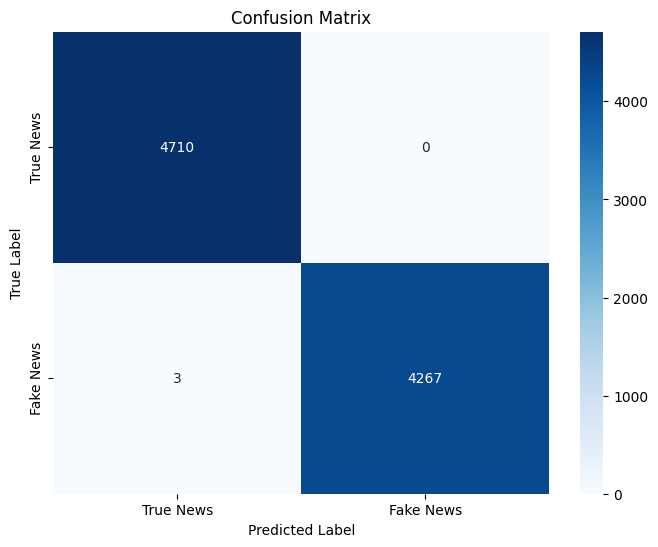

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Get predictions
predictions = trainer.predict(test_dataset)
preds = np.argmax(predictions.predictions, axis=-1)  # Get the predicted class indices
labels = predictions.label_ids

# Compute confusion matrix
cm = confusion_matrix(labels, preds)

# Plot the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["True News", "Fake News"], yticklabels=["True News", "Fake News"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

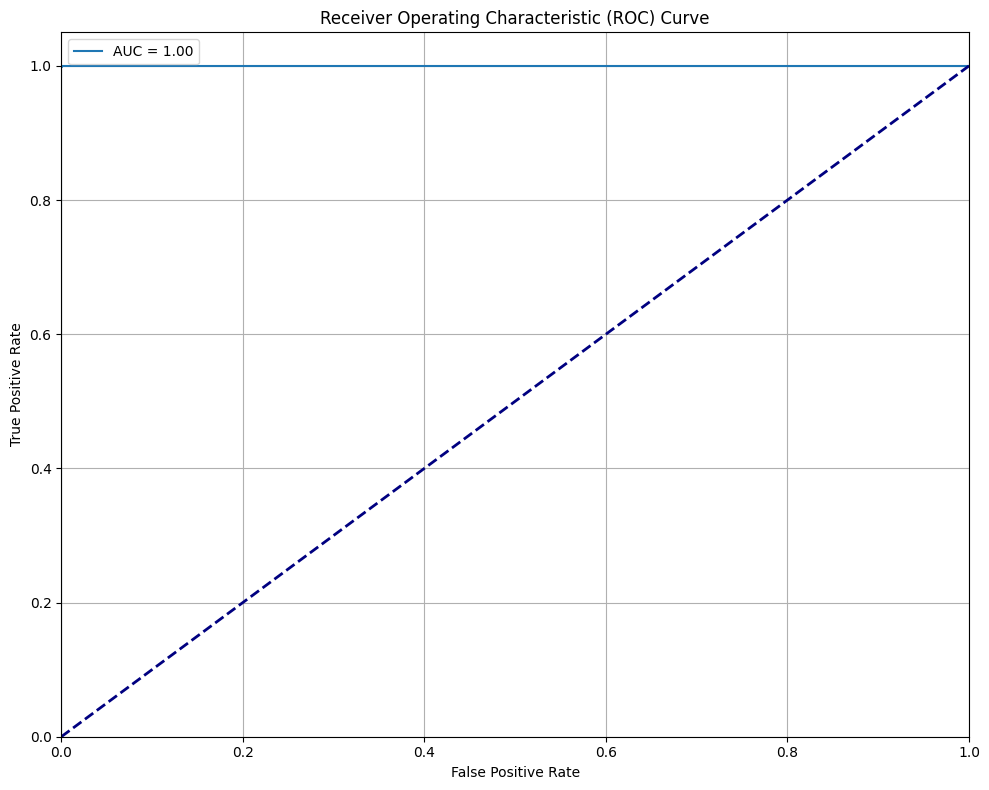

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predictions with probability scores from your trained model
predictions = trainer.predict(test_dataset)

# Extract probabilities for class 0 (positive class)
y_pred_proba = predictions.predictions[:, 0]  # Get scores for class 0 (positive)
y_true = predictions.label_ids  # True labels

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba, pos_label=0)  # Set pos_label=0 for positive class
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="upper left")  # Add legend to the plot
plt.grid(True)
plt.tight_layout()
plt.show()


Evaluate the Model

In [ ]:
trainer.evaluate()

{'eval_loss': 0.003889273852109909,
 'eval_accuracy': 0.9996659242761693,
 'eval_precision': 0.9996661369278076,
 'eval_recall': 0.9996659242761693,
 'eval_f1': 0.9996659187569783,
 'eval_runtime': 60.7146,
 'eval_samples_per_second': 147.905,
 'eval_steps_per_second': 9.256,
 'epoch': 3.0}

In [ ]:
import numpy as np

# Get logits from the predictions
logits = predictions.predictions

# Save to .npy file
np.save("../data/roberta_logits.npy", logits)